In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.metrics import roc_auc_score, roc_curve

In [ ]:
# 特徴量リストを読み込み
df_features = pd.read_csv("NUSW-NB15_features.csv", encoding='cp1252')
feature_names = df_features['Name'].tolist()

# 本体データを読み込み
df = pd.read_csv("UNSW-NB15_1.csv", header=None, low_memory=False)
df.columns = feature_names

numerical_features = [
    "dur",
    "sbytes",
    "dbytes",
    "sttl",
    "dttl",
    "sloss",
    "dloss",
    "Sload",
    "Dload",
    "Spkts",
    "Dpkts",
    "swin",
    "dwin",
    "stcpb",
    "dtcpb",
    "smeansz",
    "dmeansz",
    "trans_depth",
    "res_bdy_len",
    "Sjit",
    "Djit",
    "Sintpkt",
    "Dintpkt",
    "tcprtt",
    "synack",
    "ackdat",
    "ct_state_ttl",
    "ct_flw_http_mthd",
    "ct_ftp_cmd",
    "ct_srv_src",
    "ct_srv_dst",
    "ct_dst_ltm",
    "ct_src_ ltm",
    "ct_src_dport_ltm",
    "ct_dst_sport_ltm",
    "ct_dst_src_ltm"
]

# データ数を制限（最初の1000行）
#df = df.iloc[:1000, :]

# 正常データと異常データを分離
normal_data = df[df['Label'] == 0]
anomaly_data = df[df['Label'] == 1]

print(f"正常データ: {len(normal_data)}件")
print(f"異常データ: {len(anomaly_data)}件")

# 正常データを学習用とテスト用に分割（重複なし）
train_size = 0.8  # 学習データの割合
normal_train = normal_data.sample(frac=train_size, random_state=42)
normal_test = normal_data.drop(normal_train.index)

# トレーニングデータ（正常データのみのカテゴリカル特徴量）
X_train = normal_train[numerical_features]
y_train = normal_train['Label']  # すべて0

# テストデータ（同じ特徴量セット）
test_data = pd.concat([normal_test, anomaly_data])
X_test = test_data[numerical_features]
y_test = test_data['Label']

print(f"トレーニングデータ: {len(X_train)}件 (すべて正常データ)")
print(f"テストデータ: {len(X_test)}件")
print(f" - 正常データ: {sum(y_test == 0)}件")
print(f" - 異常データ: {sum(y_test == 1)}件")

正常データ: 677786件
異常データ: 22215件
トレーニングデータ: 542229件 (すべて正常データ)
テストデータ: 157772件
 - 正常データ: 135557件
 - 異常データ: 22215件


In [9]:
clf = IsolationForest()
clf.fit(X_train)
scores = clf.decision_function(X_test)

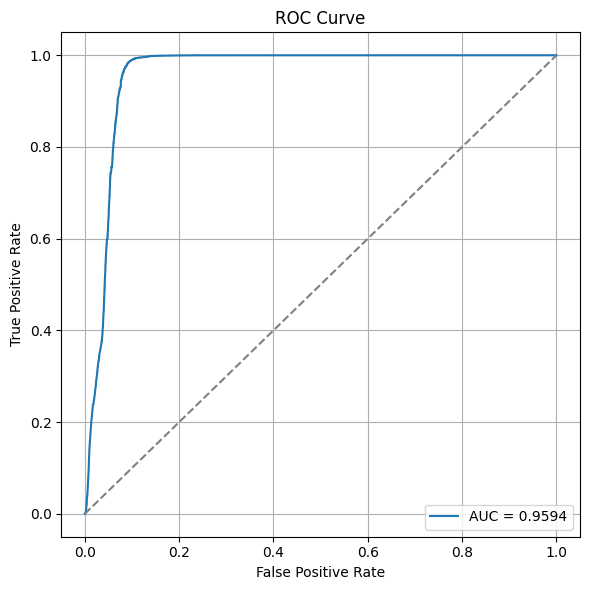

In [11]:
fpr, tpr, _ = roc_curve(y_test, -scores)
auc_score = roc_auc_score(y_test, -scores)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.4f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()